# **Importation des packages utiles**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Chargement et description du DataSet**

## **Notes**

- Ladite base de données contients **1470 employés** et **34 attributs (variables)** dont **16 qualitatives** et **18 considérées comme étant quantitative** (à vérifier).
- Le jeu de données ne contient ni de données dupliquées (par rapport à toutes les colonnes), ni de données manquantes.
- Deux variables (Over18 et StandardHours) sont jugées inutiles à l'analyse car n'ayant qu'une seule modalité (unique). Elles ne varient pas. 

## **Chargement**

In [2]:
#chargement
data = pd.read_excel('cas_pratique.xlsx' , sheet_name = 0)

In [3]:
#apperçu
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Very High,80,1,6,3,Better,2,2,2,2


## **Description**

In [4]:
#description 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
#Analyse des données dupliquées
data.duplicated().sum()

0

In [6]:
#Analyse des valeurs/modalités uniques des variables
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [7]:
#Analyse des données manquantes
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

# **DataViz & Vérification des hypothèses**

## **Hypothèse 1 (vérifiée)**

**Hypothèse** : Les employés célibataires présentent la plus grande 
proportion de départ,
 par rapport à leurs collègues marié ou 
divorcés.

In [8]:
#Liste des noms des variables 
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#tableau de contingence entre les variables Attrition et MaritalStatus
pd.crosstab(index = data.MaritalStatus , columns = data.Attrition , 
            margins = True , margins_name = 'Total', normalize = 'columns' )

Attrition,No,Yes,Total
MaritalStatus,,,
Divorced,0.238443,0.139241,0.222449
Married,0.477697,0.354430,0.457823
Single,0.283861,0.506329,0.319728


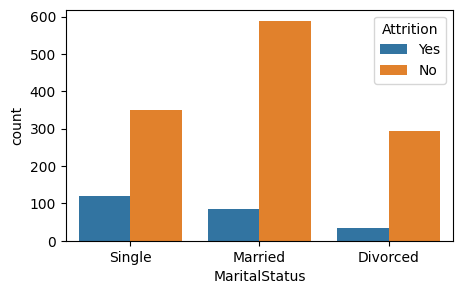

In [10]:
#Diagramme en barre 
plt.figure(figsize = (5,3))
sns.countplot(data = data , x = 'MaritalStatus' , hue = 'Attrition');

## **Hypothèse 2 (vérifiée)**

**Hypothèse** : Environ 10% des employés quittent l'entreprise
après deux années d’ancienneté.

In [11]:
#Liste des noms des variables
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
#Liste de valeurs uniques par rapport à l'ancienneté
data.YearsAtCompany.unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [13]:
#Création d'une variable Catégorie d'ancienneté (feature engineering)
##défintion de fonction de création 
def categorize(element) :
    if element > 2 :
        return "+2ans"
    return "2ans & -"
##création de la variable
data['Anciennete'] = data["YearsAtCompany"].map(categorize)
##valeurs unique de la variable ancienneté 
data.Anciennete.unique()

array(['+2ans', '2ans & -'], dtype=object)

In [14]:
#Tableau de contingence
pd.crosstab(index = data.Anciennete , columns = data.Attrition , 
            margins = True , margins_name = 'Total', normalize = True )*100

Attrition,No,Yes,Total
Anciennete,,,
+2ans,67.551020,9.183673,76.734694
2ans & -,16.326531,6.938776,23.265306
Total,83.877551,16.122449,100.000000


## **Hypothèse 3 (vérifiée)**

**Hypothèse :** Les employés loyaux, bénéficiant de salaires très
élevés et de beaucoup de responsabilités, affichent une proportion
de départs plus faible que leurs collègues.

Un employé est considéré comme loyal s'il n'a jamais travaillé dans une autre entreprise et a plus de 10 ans d'ancienneté.

In [109]:
#Création d'une variable Loyaute grace au boolean indexing
##Creation de la variable loyaute
data["Loyaute"] = "Non Loyal"
##Boolean indexing
masque = (data['NumCompaniesWorked'] == 0) & (data['YearsAtCompany'] > 10 )
data.loc[ masque , 'Loyaute'] = data.loc[masque , 'Loyaute'].replace("Non Loyal" , 'Loyal')
data.Loyaute.unique()

array(['Non Loyal', 'Loyal'], dtype=object)

Un salaire est considéré comme élevé s'il atteint les 2/3 du salaire maximal.

In [110]:
#calcul des 2/3 di salaire maximal
(2*data['MonthlyIncome'].max())/3

13332.666666666666

In [111]:
#définition d'une fonction ImportanceSalaire qui retourne "Elevé" si le salaire
#est >= au 2/3 du salaire maximal (13 333) et "Non élevé" sinon. 
def importanceSalaire(element):
    if element >= 13333 :
        return 'Eleve'
    return 'Non Eleve'

In [112]:
#Feature engineering
data["ImportanceSalaire"] = data['MonthlyIncome'].map(importanceSalaire)
#apperçu
data.ImportanceSalaire.unique()

array(['Non Eleve', 'Eleve'], dtype=object)

In [113]:
#Proportions des modalités
data.ImportanceSalaire.value_counts()

ImportanceSalaire
Non Eleve    1298
Eleve         172
Name: count, dtype: int64

Un employé est considéré comme ayant beaucoup de responsabilités s'il a un niveau de travail élevé (>= 3).

In [114]:
#Création d'une variable Responsabilite grace au boolean indexing
##Creation de la variable Responsabilite
data["Responsabilite"] = "Pas Beaucoup"
##Boolean indexing
masque = data['JobLevel'] >= 3
data.loc[ masque , 'Responsabilite'] = data.loc[masque , 'Responsabilite'].replace("Pas Beaucoup" , 'Beaucoup')
data.Responsabilite.unique()

array(['Pas Beaucoup', 'Beaucoup'], dtype=object)

In [115]:
#Proportion des modalités
data.Responsabilite.value_counts()

Responsabilite
Pas Beaucoup    1077
Beaucoup         393
Name: count, dtype: int64

In [116]:
#Création du masque de vérification de l'hypothèse 3
mask = (data['Loyaute'] == 'Loyal') & (data['ImportanceSalaire'] == 'Eleve') & (data['Responsabilite'] == 'Beaucoup')

In [117]:
#Création d'une variable BestEmployee grace au boolean indexing
##Creation de la variable BestEmployee
data["BestEmployee"] = "Non"
##Boolean indexing
data.loc[ mask , 'BestEmployee'] = data.loc[mask , 'BestEmployee'].replace("Non" , 'Oui')
data.BestEmployee.unique()

array(['Non', 'Oui'], dtype=object)

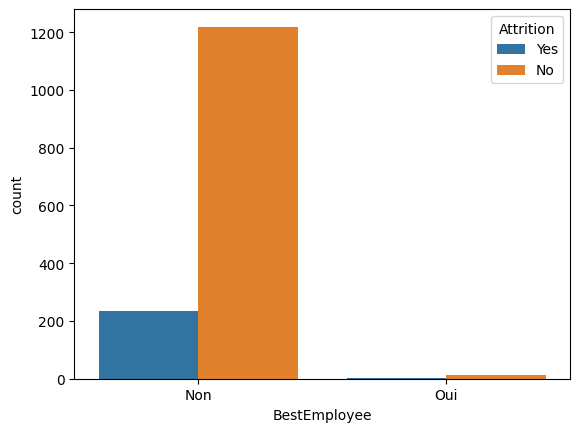

In [118]:
#Visualisation 
sns.countplot(data = data , x = 'BestEmployee' , hue = 'Attrition');

In [119]:
#tableau de contingence entre les variables Attrition et BestEmployee
pd.crosstab(index = data.BestEmployee , columns = data.Attrition , 
            margins = True , margins_name = 'Total')#, normalize = 'index' )

Attrition,No,Yes,Total
BestEmployee,,,
Non,1219,236,1455
Oui,14,1,15
Total,1233,237,1470


## **Hypothèse 4 (Non vérifiée)**

**Hypothèse :** Les employés qui habitent loin de leur lieu de 
travail ont plus tendance à quitter l’entreprise.

In [122]:
#description
data.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

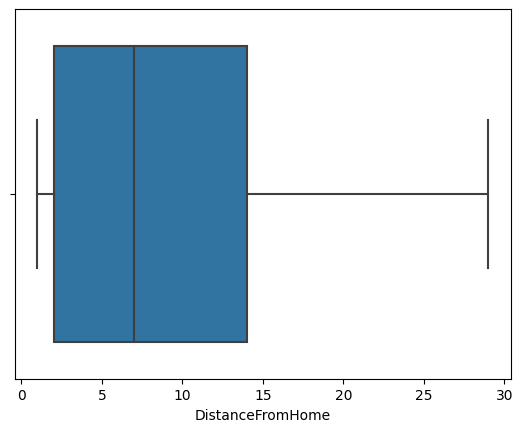

In [124]:
#Vérification de valeurs abérrantes
sns.boxplot(data = data , x = 'DistanceFromHome');

Un employé est considéré comme habitant loin si la distance entre son domicile et le lieu de travail est supérieure à la distance moyenne. 

In [125]:
#distance moyenne
data.DistanceFromHome.mean()

9.19251700680272

In [131]:
#Création d'une fonction estLoin qui retourne "Loin" si l'employé habite loin et 'Pas Loin' sinon.
def estLoin(element):
    if element >= 9.19251700680272 :
        return 'Oui'
    return 'Non'

In [132]:
#Creation d'une variable estLoin dans la base
data['estLoin'] = data['DistanceFromHome'].map(estLoin)
#apperçu 
data.estLoin.value_counts()

estLoin
Non    940
Oui    530
Name: count, dtype: int64

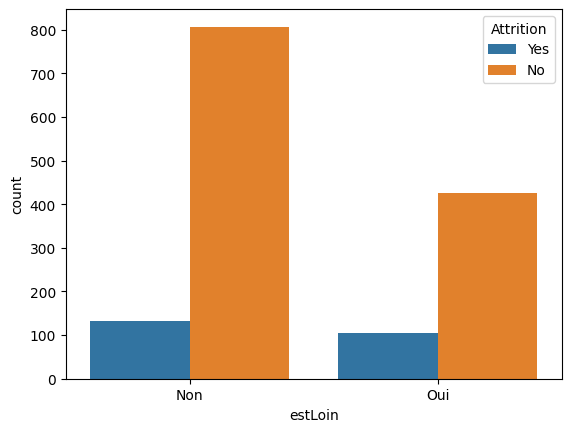

In [133]:
#Visualisation
sns.countplot(data = data , x = 'estLoin' , hue = 'Attrition'); 

In [134]:
#tableau de contingence entre les variables Attrition et estLoin
pd.crosstab(index = data.estLoin , columns = data.Attrition , 
            margins = True , margins_name = 'Total')#, normalize = 'index' )

Attrition,No,Yes,Total
estLoin,,,
Non,807,133,940
Oui,426,104,530
Total,1233,237,1470


## **Hypothèse 5 (Non vérifiée)**

**Hypothèse :** Les employés qui font fréquemment des voyages
d’affaire présentent une proportion plus élevée de départs.

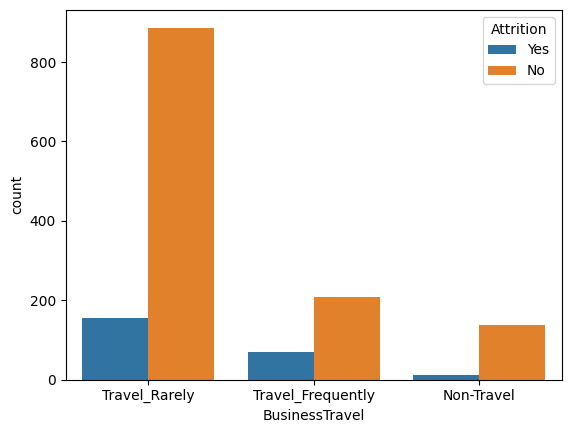

In [137]:
#Visualisation 
sns.countplot(data = data , x = 'BusinessTravel', hue = 'Attrition');

## **Hypothèse 6 (Vérifiée)**

**Hypothèse :** Les employés qui font des d’heures supplémentaires
sont plus nombreux à quitter l’entreprise comparé à ceux qui n’en
font pas.

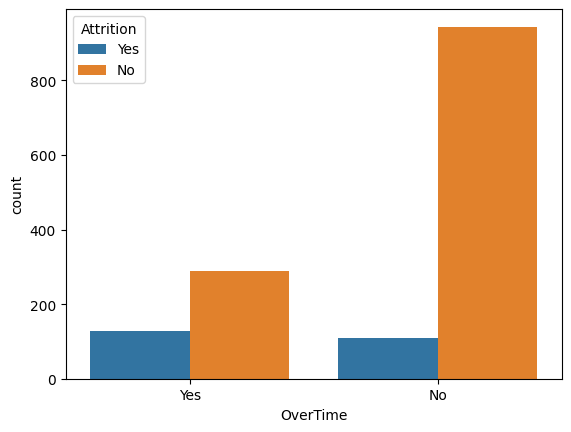

In [140]:
#visualisation 
sns.countplot(data = data , x = 'OverTime' , hue ='Attrition' );

In [143]:
#tableau de contingence entre les variables Attrition et OverTime
pd.crosstab(index = data.OverTime , columns = data.Attrition , 
            margins = True , margins_name = 'Total', normalize = 'index' )*100

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846
Total,83.877551,16.122449


## **Hypothèse 7 (vérifiée)**

**Hypothèse :** Les employés qui travaillent comme « représentant
commercial » affichent un pourcentage important de départs.

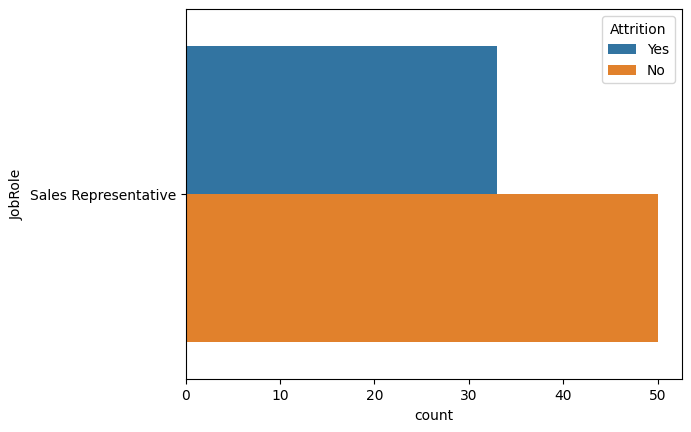

In [147]:
#visualisation 
sns.countplot(data = data[data['JobRole'] == 'Sales Representative'] , y = 'JobRole' , hue = 'Attrition');

In [152]:
#tableau de contingence entre les variables Attrition et OverTime
pd.crosstab(index = data.JobRole , columns = data.Attrition , 
            margins = True , margins_name = 'Total', normalize = 'index' )*100

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


## **Hypothèse 8 (Non vérifiée)**

**Hypothèse :** Les employés qui ont déjà travaillé dans plusieurs
entreprises, auparavant, représentent la plus grande proportion de
départs.

In [153]:
#définition d'une fonction ontTDPE (ont travaillé dans plusieurs entreprises) qui retourne 'Oui' si l'employé a 
#travaillé dans plusieurs (au moins 2) entreprises et 'Non' sinon. 
def ontTDPE(element):
    if element >= 2 :
        return 'Oui'
    return 'Non'

In [154]:
#creation de la variable ontTDPE 
data['MultipleEntreprises'] = data["NumCompaniesWorked"].map(ontTDPE)
#apperçu 
data.MultipleEntreprises.value_counts()

MultipleEntreprises
Oui    752
Non    718
Name: count, dtype: int64

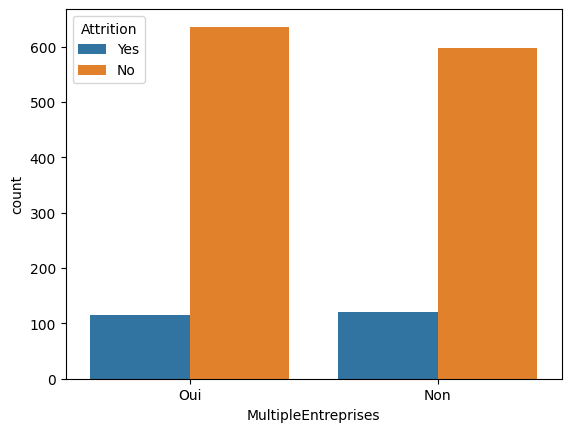

In [155]:
#visualisation 
sns.countplot(data = data , x = 'MultipleEntreprises' , hue = 'Attrition');

In [160]:
#tableau de contingence entre les variables Attrition et MultipleEntreprises
pd.crosstab(index = data.MultipleEntreprises , columns = data.Attrition , 
            margins = True , margins_name = 'Total', normalize = 'columns' )*100

Attrition,No,Yes,Total
MultipleEntreprises,,,
Non,48.418491,51.054852,48.843537
Oui,51.581509,48.945148,51.156463
